In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from celmech.secular import LaplaceLagrangeSystem
from celmech import Poincare
%matplotlib inline
plt.style.use('paper.mplstyle')

In [2]:
def make_sim(P, mass, ecc, pom):
    P1, P2, P3 = P
    mu1, mu2, mu3 = mass
    ecc1, ecc2, ecc3 = ecc
    pomega1, pomega2, pomega3 = pom
    
    # start simulation
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun')

    # add star, planet 1, planet 2
    sim.add(m=1.)
    sim.add(m=mu1, P=P1, e=ecc1, pomega=pomega1)
    sim.add(m=mu2, P=P2, e=ecc2, pomega=pomega2)
    sim.add(m=mu3, P=P3, e=ecc3, pomega=pomega3)
    ps = sim.particles
    ps[1].r = ps[1].a*(ps[1].m/3/ps[0].m)**(1/3)
    ps[2].r = ps[2].a*(ps[2].m/3/ps[0].m)**(1/3)

    sim.move_to_com()
    sim.integrator = "whfast"
    sim.ri_whfast.safe_mode = 0
    sim.dt = sim.particles[1].P/12
    sim.collision = "direct"
    
    return sim

In [18]:
P = 1, 1.18, 1.46
ecc = 0,0,0
pomega = 0, 2*np.pi/3, -2*np.pi/3
mass = 3e-6, 1e-100, 3e-6
sim = make_sim(P, mass, ecc, pomega)
ps = sim.particles

Text(-0.13, -0.115, '$e_{13}$')

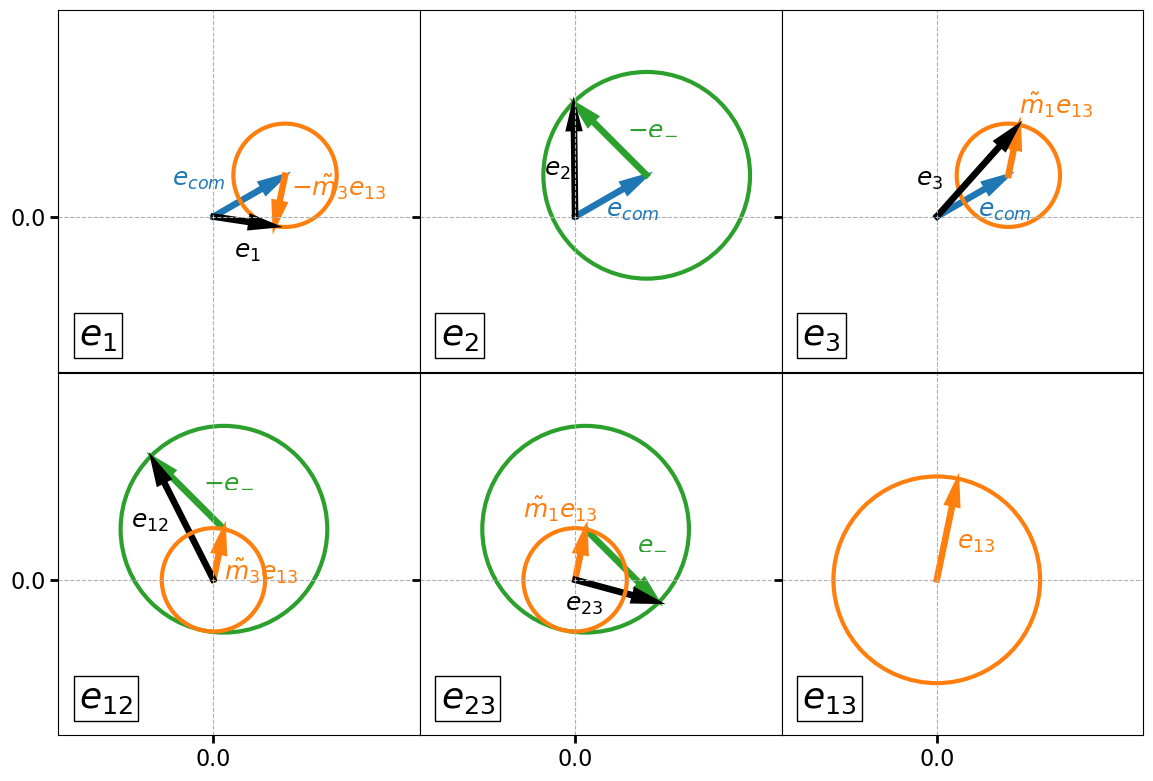

In [103]:
dpi = 300.4

k=10
eminus, e13, ecom = 0.01,0.01,0.008
eminus, e13, ecom = k*eminus, k*e13, k*ecom
pminus, p13, pcom = -np.pi/4,np.pi/2.3,np.pi/6

ecomx, ecomy = ecom*np.cos(pcom), ecom*np.sin(pcom)

s=0.95
fig, (axarr1,axarr2) = plt.subplots(figsize=(14,14*2/3+0.1), sharex=True, sharey=True,nrows=2, ncols=3)

# --------------------------(1,1)--------------------------
ax = axarr1[0]
e13x = -ps[3].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.cos(p13)
e13y = -ps[3].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.sin(p13)

ax.arrow(0, 0, s*ecomx, s*ecomy, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:blue', ec='tab:blue', length_includes_head=True)
circle = plt.Circle((ecomx, ecomy), np.sqrt(e13x**2 + e13y**2), color='tab:orange', fill=False, lw=3)
ax.add_patch(circle)
ax.arrow(ecomx, ecomy, s*e13x, s*e13y, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:orange', ec='tab:orange', length_includes_head=True)
ax.arrow(0, 0, s*(ecomx+e13x), s*(ecomy+e13y), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)

# ---------------------------(1,2)-------------------------
ax = axarr1[1]
eminusx = -eminus*np.cos(pminus)
eminusy = -eminus*np.sin(pminus)

ax.arrow(0, 0, s*ecomx, s*ecomy, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:blue', ec='tab:blue', length_includes_head=True)
circle = plt.Circle((ecomx, ecomy), np.sqrt(eminusx**2 + eminusy**2), color='tab:green', fill=False, lw=3)
ax.add_patch(circle)
ax.arrow(ecomx, ecomy, s*eminusx, s*eminusy, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:green', ec='tab:green', length_includes_head=True)
ax.arrow(0, 0, s*(ecomx+eminusx), s*(ecomy+eminusy), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)

# ----------------------------(1,3)------------------------
ax = axarr1[2]
# ax.text(-0.15, 0.0, r'$e_{3}$', c='tab:green', fontsize=18)
e13x = ps[1].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.cos(p13)
e13y = ps[1].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.sin(p13)

ax.arrow(0, 0, s*ecomx, s*ecomy, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:blue', ec='tab:blue', length_includes_head=True)
circle = plt.Circle((ecomx, ecomy), np.sqrt(e13x**2 + e13y**2), color='tab:orange', fill=False, lw=3)
ax.add_patch(circle)
ax.arrow(ecomx, ecomy, s*e13x, s*e13y, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:orange', ec='tab:orange', length_includes_head=True)
ax.arrow(0, 0, s*(ecomx+e13x), s*(ecomy+e13y), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)

# --------------------------------(2,1)---------------------------------------------------------
ax = axarr2[0]
e13x = ps[3].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.cos(p13)
e13y = ps[3].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.sin(p13)
eminusx = -eminus*np.cos(pminus)
eminusy = -eminus*np.sin(pminus)

ax.arrow(e13x, e13y, s*eminusx, s*eminusy, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:green', ec='tab:green', length_includes_head=True)
circle = plt.Circle((e13x, e13y), np.sqrt(eminusx**2 + eminusy**2), color='tab:green', fill=False, lw=3)
ax.add_patch(circle)
ax.arrow(0, 0, s*e13x, s*e13y, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:orange', ec='tab:orange', length_includes_head=True)
ax.arrow(0, 0, s*(eminusx+e13x), s*(eminusy+e13y), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
circle = plt.Circle((0,0), np.sqrt(e13x**2 + e13y**2), color='tab:orange', fill=False, lw=3)
ax.add_patch(circle)

# --------------------------------(2,2)--------------------
ax = axarr2[1]
e13x = ps[1].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.cos(p13)
e13y = ps[1].m/(ps[1].m+ps[2].m+ps[3].m)*e13*np.sin(p13)
eminusx = eminus*np.cos(pminus)
eminusy = eminus*np.sin(pminus)

ax.arrow(e13x, e13y, s*eminusx, s*eminusy, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:green', ec='tab:green', length_includes_head=True)
circle = plt.Circle((e13x, e13y), np.sqrt(eminusx**2 + eminusy**2), color='tab:green', fill=False, lw=3)
ax.add_patch(circle)
ax.arrow(0, 0, s*e13x, s*e13y, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:orange', ec='tab:orange', length_includes_head=True)
ax.arrow(0, 0, s*(eminusx+e13x), s*(eminusy+e13y), head_width=0.01, linewidth=4, head_length=0.02, fc='k', ec='k', length_includes_head=True)
circle = plt.Circle((0, 0), np.sqrt(e13x**2 + e13y**2), color='tab:orange', fill=False, lw=3)
ax.add_patch(circle)

# -------------------------------(2,3)---------------------
ax = axarr2[2]
e13x = e13*np.cos(p13)
e13y = e13*np.sin(p13)

circle = plt.Circle((0,0), e13, color='tab:orange', fill=False, lw=3)
ax.add_patch(circle)
ax.arrow(0, 0, s*e13x, s*e13y, head_width=0.01, linewidth=4, head_length=0.02, fc='tab:orange', ec='tab:orange', length_includes_head=True)

for ax in axarr1:
    ax.set_aspect('equal')
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xlim([-0.2, 0.2])
    ax.set_ylim([-0.2, 0.2])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid('on', linestyle='--')
    
for ax in axarr2:
    ax.set_aspect('equal')
    ax.set_xticks([0])
    ax.set_yticks([0])
    ax.set_xlim([-0.15,0.2])
    ax.set_ylim([-0.15,0.2])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid('on', linestyle='--')

axarr1[0].set_xticklabels(['0.0'])
axarr1[0].set_yticklabels(['0.0'])
fig.subplots_adjust(hspace=0, wspace=0)

xpos, ypos = -0.13,-0.115
axarr1[0].text(-0.04, 0.03, r'$e_{com}$', c='tab:blue', fontsize=18)
axarr1[0].text(0.02, -0.04, r'$e_1$', c='k', fontsize=18)
axarr1[0].text(0.075, 0.02, r'$-\tilde{m}_3 e_{13}$', c='tab:orange', fontsize=18)
axarr1[0].text(xpos, ypos, r'$e_1$',horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='white',edgecolor='k'),fontsize=26)

axarr1[1].text(0.03, 0.0, r'$e_{com}$', c='tab:blue', fontsize=18)
axarr1[1].text(-0.03, 0.04, r'$e_2$', c='k', fontsize=18)
axarr1[1].text(0.05, 0.08, r'$-e_{-}$', c='tab:green', fontsize=18)
axarr1[1].text(xpos, ypos, r'$e_2$',horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='white',edgecolor='k'),fontsize=26)

axarr1[2].text(0.04, 0.0, r'$e_{com}$', c='tab:blue', fontsize=18)
axarr1[2].text(-0.02, 0.03, r'$e_3$', c='k', fontsize=18)
axarr1[2].text(0.08, 0.1, r'$\tilde{m}_1 e_{13}$', c='tab:orange', fontsize=18)  
axarr1[2].text(xpos, ypos, r'$e_3$',horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='white',edgecolor='k'),fontsize=26)

axarr2[0].text(-0.01,0.09, r'$-e_{-}$', c='tab:green', fontsize=18)
axarr2[0].text(-0.08, 0.05, r'$e_{12}$', c='k', fontsize=18)
axarr2[0].text(0.01, 0, r'$\tilde{m}_3 e_{13}$', c='tab:orange', fontsize=18)
axarr2[0].text(xpos, ypos, r'$e_{12}$',horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='white',edgecolor='k'),fontsize=26)

axarr2[1].text(0.06, 0.03, r'$e_{-}$', c='tab:green', fontsize=18)
axarr2[1].text(-0.01, -0.03, r'$e_{23}$', c='k', fontsize=18)
axarr2[1].text(-0.05, 0.06, r'$\tilde{m}_1 e_{13}$', c='tab:orange', fontsize=18)
axarr2[1].text(xpos, ypos, r'$e_{23}$',horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='white',edgecolor='k'),fontsize=26)

axarr2[2].text(0.02, 0.03, r'$e_{13}$', c='tab:orange', fontsize=18)
axarr2[2].text(xpos, ypos, r'$e_{13}$',horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='white',edgecolor='k'),fontsize=26)

In [104]:
fig.savefig('3p.pdf', transparent=True, dpi=dpi, bbox_inches='tight') 